In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

import mplfinance as mpf

In [2]:
def save_to_csv(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    df = yf.download(ticker, start, end, progress=False)
    df.to_csv(ticker + '.csv')
    return df

def read_from_csv(ticker):
    try:
        df = pd.read_csv(ticker + '.csv')
    except:
        print('File not found!')
    return df

def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv(ticker + '.csv')
    return df

def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])

    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['daily_return'].mean()

    df2 = df.loc[mask]
    days = df2.shape[0]
    
    return (days * daily_ret)

# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv(ticker + '.csv', index_col=0, parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        
        mpf.plot(df_sub,type='candle')
        mpf.plot(df_sub,type='line')
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        fig = mpf.figure(figsize=(12, 8), style=s) 
        ax = fig.add_subplot(2,1,1) 
        av = fig.add_subplot(2,1,2, sharex=ax)  

        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv(ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        df_np = (df.loc[start:end]).to_numpy()

        np_adj_close = df_np[:,5]
        date_arr = df_np[:,1]

        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        axes.plot(date_arr, np_adj_close, color='navy')

        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        axes.set_facecolor('#FAEBD7')

def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv(x, syear, smonth, sday, eyear, emonth, eday)

def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = yf.download(x, start, end, progress=False)[col_name]

    return mult_df

def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

In [3]:
AMZN = save_to_csv('AMZN', 2020, 1, 1, 2021, 1, 1)
AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000


In [4]:
AMZN = read_from_csv('AMZN')
AMZN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
...,...,...,...,...,...,...,...
249,2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000
250,2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000
251,2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000
252,2020-12-30,167.050003,167.104996,164.123505,164.292496,164.292496,64186000


In [5]:
add_daily_return_to_df(AMZN, 'AMZN')

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000,NaN
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,0.027151
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,-0.012139
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.014886
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.002092
...,...,...,...,...,...,...,...,...
249,2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,-0.003949
250,2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,0.035071
251,2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,0.011584
252,2020-12-30,167.050003,167.104996,164.123505,164.292496,164.292496,64186000,-0.010882


In [6]:
get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)

0.6413535089632028

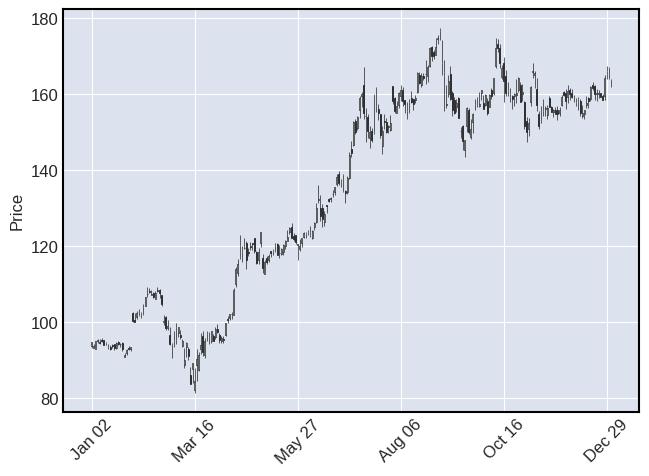

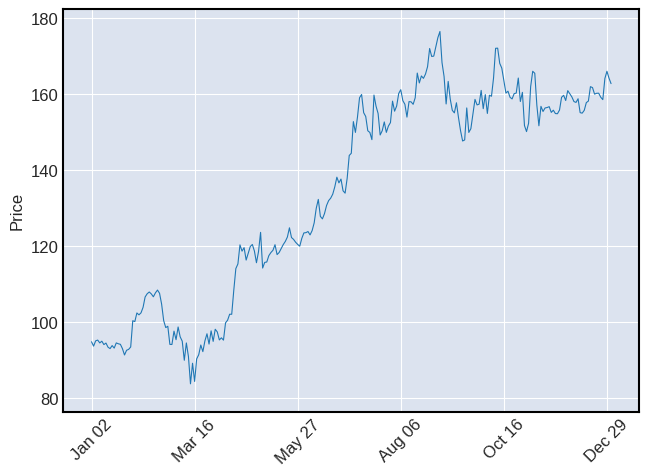

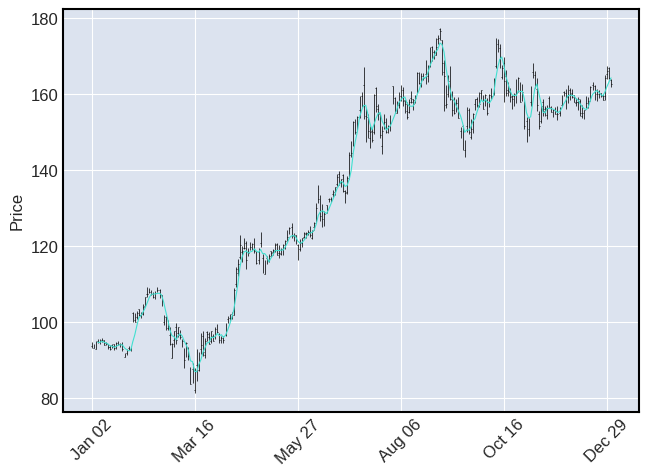

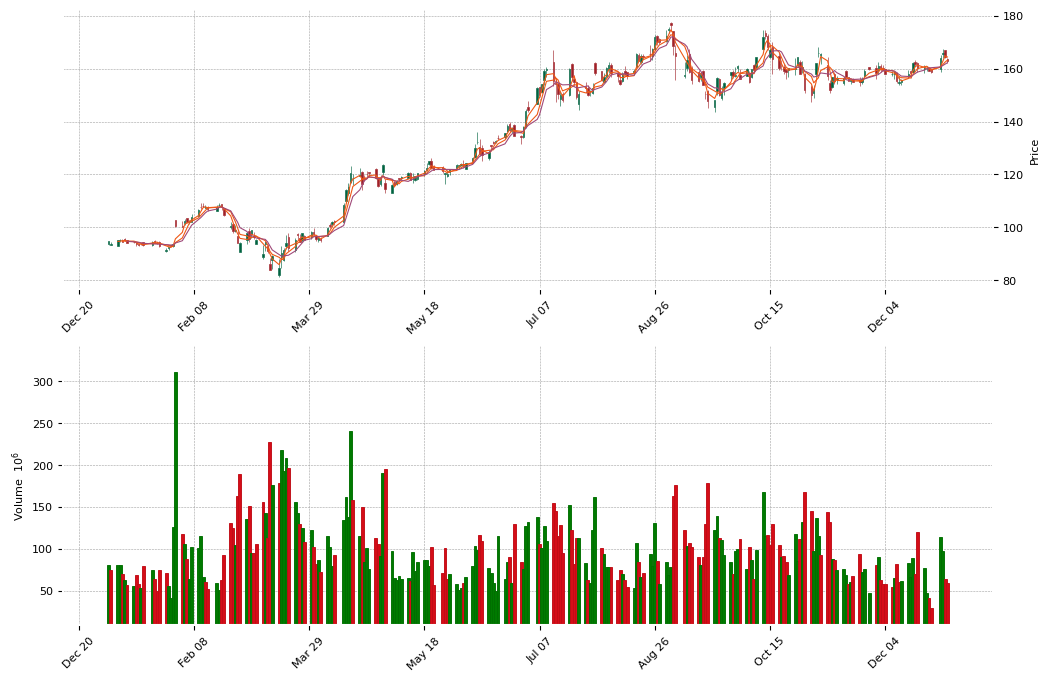

In [7]:
mplfinance_plot('AMZN', 'candle', 2020, 1, 1, 2021, 1, 1)

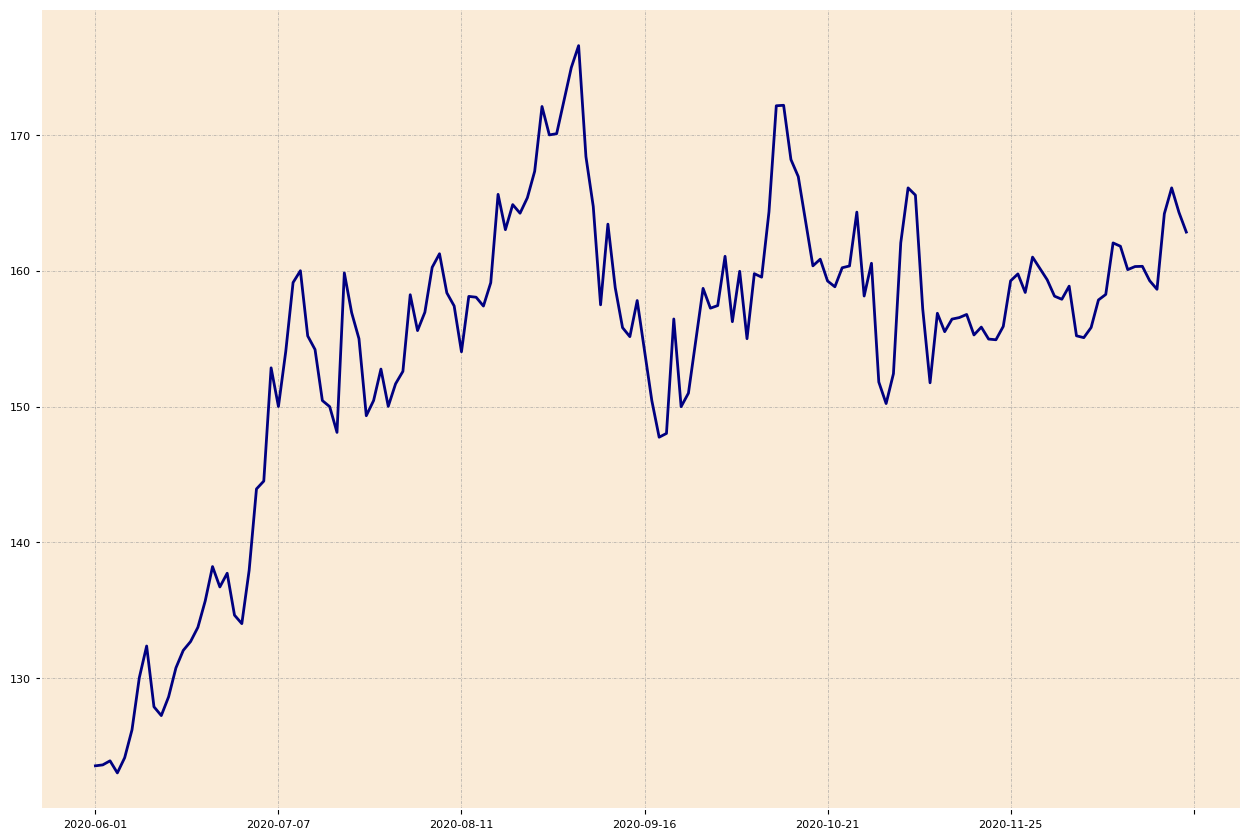

In [8]:
price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

In [9]:
tickers = ["AAPL", "NFLX", "GOOG"]
download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

tickers = ["AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('Adj Close',  2020, 1, 1, 2021, 1, 1, *tickers)
mult_df.tail()

,AMZN,AAPL,NFLX,GOOG
Date,,,,
2020-12-24,158.634506,130.205780,513.969971,86.942497
2020-12-28,164.197998,134.862671,519.119995,88.804497
2020-12-29,166.100006,133.067017,530.869995,87.935997
2020-12-30,164.292496,131.932373,524.590027,86.975998
2020-12-31,162.846497,130.916153,540.729980,87.594002


In [10]:
get_mult_stock_mean_sd(mult_df)

Stock: AMZN Mean:  133.88 Standard deviation: 27.36
Coefficient of Variation: 0.20435781689404053

Stock: AAPL Mean:   93.69 Standard deviation: 21.66
Coefficient of Variation: 0.23121430429501036

Stock: NFLX Mean:  446.34 Standard deviation: 65.94
Coefficient of Variation: 0.1477296771946909

Stock: GOOG Mean:   74.04 Standard deviation: 8.79
Coefficient of Variation: 0.11875274056852436



In [11]:
mult_df

,AMZN,AAPL,NFLX,GOOG
Date,,,,
2019-12-31,92.391998,71.810936,323.570007,66.850998
2020-01-02,94.900497,73.449394,329.809998,68.368500
2020-01-03,93.748497,72.735313,325.899994,68.032997
2020-01-06,95.143997,73.314888,335.829987,69.710503
2020-01-07,95.343002,72.970078,330.750000,69.667000
...,...,...,...,...
2020-12-24,158.634506,130.205780,513.969971,86.942497
2020-12-28,164.197998,134.862671,519.119995,88.804497
2020-12-29,166.100006,133.067017,530.869995,87.935997
